### Idea:
Do users that born after 1985 have longer trip duration comparing with older users?

I will use the data from 2015 to do the hypothesis test.

*Improved my idea according to max's comment. Instead of using 30 years old, I state the year that would determine if the user is younger or older than 30 years old.*

### Null Hypothesis:

The trip duration of users that born in or after 1985 is about the same or shorter comparing with older users in 2015.

*According to max's comment, I added the year of data I am using.*

### Alternative Hypothesis:

Users that born in or after 1985 have longer trip durations comparing with older users in 2015.

### Formulated Hypothesis:

P0 = average trip duration of users that born in or after 1985.

P1 = average trip duration of users that born before 1985.

H0: P0 <= P1

H1: p0 > p1

I will use a significant level of $\alpha$ = 0.05

In [32]:
import os
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
datestring = '201508'
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [11]:
df_new = df[['tripduration', 'birth year']]
df_new.head()

,tripduration,birth year
0,1202,1987.0
1,301,1951.0
2,431,1985.0
3,273,1975.0
4,1256,1978.0


In [15]:
df_new.isnull()

,tripduration,birth year
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,True
8,False,True
9,False,False


In [16]:
df_new.dropna(inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df_new.isnull()

,tripduration,birth year
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
9,False,False
12,False,False
13,False,False


In [19]:
df_new['birth year'] = df_new['birth year'].astype(int)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df_new.head()

,tripduration,birth year
0,1202,1987
1,301,1951
2,431,1985
3,273,1975
4,1256,1978


In [23]:
data = df_new.groupby(['birth year']).mean()
data.reset_index(inplace=True)
data.head()

,birth year,tripduration
0,1885,889.220000
1,1899,978.666667
2,1900,1231.142857
3,1901,875.590909
4,1907,610.400000


In [43]:
data_young = data.loc[(data['birth year'] >= 1985)]
data_young.head()

,birth year,tripduration
65,1985,775.603597
66,1986,798.957139
67,1987,800.071827
68,1988,804.645776
69,1989,794.039327


In [65]:
data_old = data.loc[(data['birth year'] < 1985) & (data['birth year'] >= 1955)]
#According to max's comment, I filtered outliers. 
data_old.head()

,birth year,tripduration
35,1955,1081.896188
36,1956,840.069672
37,1957,1036.067884
38,1958,878.649271
39,1959,830.446730


Text(0.5,1,'The Relationship Between Birth Year and Trip Duration')

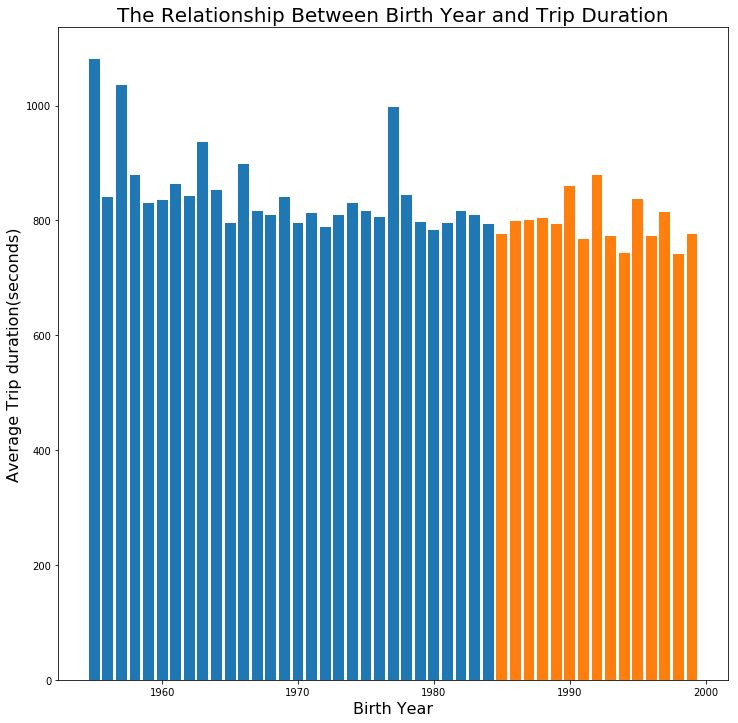

In [72]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(data_old['birth year'], data_old['tripduration'])
ax.bar(data_young['birth year'], data_young['tripduration'])
plt.xlabel('Birth Year', fontsize=16)
plt.ylabel('Average Trip duration(seconds)', fontsize=16)
plt.title('The Relationship Between Birth Year and Trip Duration', fontsize=20)

In [73]:
#According to Max's comment, I performed the Mann-Whitney U test.
st.mannwhitneyu(data_young.tripduration, data_old.tripduration)

MannwhitneyuResult(statistic=102.0, pvalue=0.0015916828791747828)

### The p-value is 0.0015, which is smaller than 0.05. The null hypothesis is rejected.